In [11]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import pickle

from time import perf_counter

# INF554 Assessment: Low Rank Approximation and Denoising of Images


In this assessment it is your task to use the PCA, MDS, SVD and NFM algorithms presented in Lecture 1 to obtain low rank approximations and denoise images.

**Please submit a zip file containing the following to moodle by the 17th October 14:00 (Paris time):**

- your filled out assessment jupyter notebook
- a pdf containing your short written answers to the 5 questions in this notebook.

Make sure to submit a couple of hours ahead of the deadline to ensure that technical difficulties do not cause you to miss the deadline. Late submissions will not be accepted.

Please note that this assessment is *to be completed individually. We will forward detected cases of plagarism to the university,* which in serious cases can have farreaching consequences for you. So, please make sure to submit your own, original solutions to this assessment. 

*Disclaimer:* You will not receive marks for importing the pca, nmf or mds functions from any library. In this assessment we ask you to code these methods from scratch in the hope that this will give you a better understanding of them.


## 1) Low Rank Approximation

We begin by briefly summarising how the four methods used in this lab can be used to obtain low rank approximations of our data. In this lab we will be working with images, where each pixel is encoded by four values, namely RGBA (red, green, blue, alpha). These four dimensions encoding each pixel will be referred to as the four channels of our images. You should create low rank approximations separately for each channel, i.e., to obtain a low rank approxiamtion for the images, you should separately calculate the low rank approximation for each channel of the input image and then concatinate these low rank approximations. Therefore, in this lab our data  will be denoted by $X_i \in R^{n\times m}$ for $i \in \{R,G,B,A\}.$



**PCA:** Let $M_i\in R^{n\times m} $ be the matrix containing the column means of $X_i$ in each column. Further, let $C_i = X_i -  M_i$ denote the data matrix $X_i,$ where the column mean is substracted from each column. Furthermore, let $U_k\in R^{m\times k}$ denote the right singular vectors of $C_i$ corresponding to the largest $k$ singular values. Then, the PCA low-rank approximation, denoted $\tilde{X}_i^{PCA},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{PCA} = C_i U_k U_k^T + M.
\end{equation}


**SVD:** Consider the singular value decomposition of $X_i = V \Sigma W^T.$ Further, let $V_k \in R^{n\times k},$ $W_k \in R^{m\times k}$ and $\Sigma_k \in R^{k\times k}$ contain the first $k$ left and right singular vectors and the largest $k$ singular values, respectivly. Then, the singular value low rank approximation, denoted $\tilde{X}_i^{SVD},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{SVD} = V_k \Sigma_k W_k^T.
\end{equation}


**NMF:** The non-negative matrix factorisation is iteratively calculated and directly produces a low rank approximation of $X_i$ into factors denoted by $A \in R^{n \times k}$ and $B\in R^{k \times m}.$ Hence,   
\begin{equation}
\tilde{X}_i^{NMF} = AB.
\end{equation}

**MDS:** 
Let $M_i\in R^{n\times m} $ be the matrix containing the column means of $X_i$ in each column. Further, let $C_i = X_i -  M_i$ denote the data matrix $X_i,$ where the column mean is substracted from each column. 
For the multidimensional scaling algorithm we utilise the singular value decomposition of the matrix denoted $C_i C_i^T.$ Let $Q_k \in R^{n\times k}$ denote the matrix containing the $k$ singular vectors corresponding to the $k$ largest singluar values of $C_i C_i^T.$ Then, the low rank approximation, denoted $\tilde{X}_i^{MDS},$ of $X_i$ is obtained as follows,
\begin{equation}
\tilde{X}_i^{MDS} =  Q_k Q_k^T C_i +M_i.
\end{equation}

















We begin with a theoretical question.

>**Question 1: (4 Points)** The principal components produced in the PCA algorithm estimate $C_i U_{j}^\star,$ where $U_{j}^\star$ contains the $j^{\mathrm{th}}$ eigenvector of the *true* covariance matrix ($Var[C_i]$) of our data. Proof that the true principal components $C_i U_{j}^\star$ for $j \in \{1,\ldots, m\}$ are uncorrelated and relate their variance to the eigenvalues of the true covariance matrix. *Hint:* Consider $Var[C_i U_j^\star]$ to answer this question. 


Now we load the image you will be working with in this assessement.





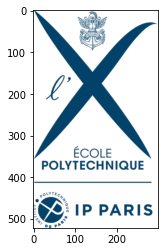

In [12]:
logo = mpimg.imread('IPPX_logo.png') 
plt.imshow(logo) 
plt.show()


>**Task 1: (8 Points)** Complete the below functions to calculate low rank approximations of an input image with 4 channels using the PCA, SVD, NMF and MDS algorithms. 

In [13]:
from scipy import linalg
from numpy import dot

def re_shape(a,shape): # transform a into a ndarray of shape logo.shape=(552,300,4)
    # a=np.array(a).reshape(logo.shape)
    a=np.array(a)
    tab=np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                tab[i,j,k]=a[k][i,j]
    return tab

def pca(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
        U (np.array, dim: m,k,4): singular vectors used to obtain the low rank approximation
    """
    
    #Please insert the code for Task 1 here
    X_low_rank_approx=[]
    U=[]
    # Center data
    M = np.mean(X, axis=1)
    # C -= M
    for i in range(4):
        C= X[:,:,i]-M[:,i].reshape(-1,1)
        U_, S, Vt = linalg.svd(C, full_matrices=False)
        
        # X_low_rank_approx.append(C @ Vt[:,:k] @ Vt[:,:k].T + M[:,i].reshape(-1,1)) # k right singular vectors
        X_low_rank_approx.append(U_[:,:k] @  U_[:,:k].T@ C + M[:,i].reshape(-1,1)) # k right singular vectors
        
        # U.append(Vt[:,:k])
        U.append(U_[:,:k])

    # a=np.array(a).reshape(X.shape)
    return re_shape(X_low_rank_approx,X.shape), re_shape(U,(X.shape[1],k,X.shape[2]))


def svd(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
    #Please insert the code for Task 1 here
    X_low_rank_approx=[]
    
    for i in range(4):
        V, S, Wt = linalg.svd(X[:,:,i], full_matrices=False)
        X_low_rank_approx.append(V[:,:k]@np.diag(S[:k])@Wt[:,:k].T)

    
    return re_shape(X_low_rank_approx,X.shape)




def nmf(X, k, max_iter = 100, E = 10**(-4)):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
    #Please insert the code for Task 1 here 
    X_low_rank_approx=[]
    
    for i in range(4):
        x=X[:,:,i]
        # mask
        mask = np.sign(x)
        # initial matrices A is random [0,1] and B is x\A.
        rows, columns = x.shape
        A = np.random.rand(rows, k)
        A = np.maximum(A, E)
        
        B = linalg.lstsq(A, x)[0] # Computes the matrix/vector B that approximately solves the equation A @ B = x
        B = np.maximum(B, E)
        
        masked_X = mask * x
        X_est_prev = dot(A, B)
        for i in range(1, max_iter + 1):
            # ===== updates =====
            top = dot(masked_X, B.T)
            bottom = (dot((mask * dot(A, B)), B.T)) + E
            A *= top / bottom
            A = np.maximum(A, E)
            
            top = dot(A.T, masked_X)
            bottom = dot(A.T, mask * dot(A, B)) + E
            B *= top / bottom
            B = np.maximum(B, E)
            
            
        X_low_rank_approx.append(A@B)

    return re_shape(X_low_rank_approx,X.shape)



def mds(X, k):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        k (int): the number of elements to be used in the low rank approximation 
    
    Returns:
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    """
    
    #Please insert the code for Task 1 here
    X_low_rank_approx=[]
    
    # Center data
    M = np.mean(X, axis=1)
    # C -= M
    for i in range(4):
        C= X[:,:,i]-M[:,i].reshape(-1,1)
        Q, S, Vt = linalg.svd(C@C.T, full_matrices=False)
        X_low_rank_approx.append(Q[:,:k]@Q[:,:k].T@C + M[:,i].reshape(-1,1))
        
    
    return re_shape(X_low_rank_approx,X.shape)


>**Task 2: (1 Points)** Apply the functions implemented in Task 1 to produce low rank approximation images for $k$ equals 1, 5, 10, 30 and 60 of the logo and plot the results using the provided function.

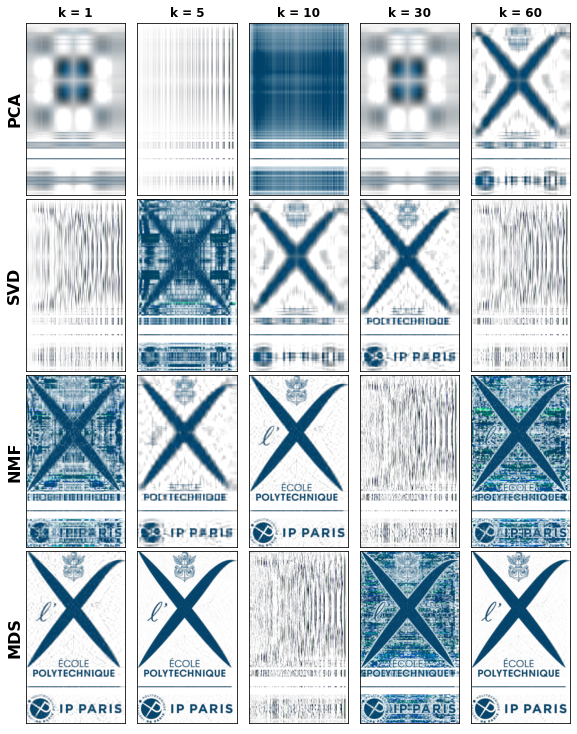

In [14]:

k_values = [1,5,10,30,60]
results_task2 = np.zeros(logo.shape + tuple([20]))


#Please insert the code for Task 2 here
i=0
j=0
for k in [1,5,10,30,60]:
    results_task2[:,:,:,i*5+j]= pca(logo, k)[0]
    results_task2[:,:,:,i*5+j+1]= svd(logo, k)
    results_task2[:,:,:,i*5+j+2]= nmf(logo, k)
    results_task2[:,:,:,i*5+j+3]= mds(logo, k)
    i=i+1
    j=j-1


fig, axs = plt.subplots(4,5, figsize=(8,10))


titles = ['k = 1','k = 5','k = 10','k = 30','k = 60']
methods = ['PCA', 'SVD', 'NMF', 'MDS']
for i in range(4):
    axs[i,0].set_ylabel(methods[i], fontsize=16,fontweight='bold')
    for j in range(5):
        if i==0:
            axs[i,j].set_title(titles[j], fontweight='bold')
        axs[i,j].imshow(np.clip(results_task2[:,:,:,i*5+j],0,1))
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
fig.tight_layout(pad=0)


>**Question 2: (2 Points)** Visually compare the low rank approximations and qualitatively assess (i) how the quality of the low rank approximatino varies as $k$ increases and (ii) which method produces the least lossy compression of the image. (No calculations or further processing are required here).

The quality of the PCA reconstruction is often evaluated by calculating the fraction of the total variance of the image that is preserved in the reconstructed image. Hence, the first evaluation metric we want to use to assess the quality of the reconstruction is the sum of the eigenvalues of the estimated covariance matrix $(\tilde{C}_i^{h})^T \tilde{C}_i^{h}/n$ for $h \in \{\text{PCA, SVD, NMF, MDS}\}$ divided by the sum of eigenvalues of the estimated covariance matrix of the original image $C_i^T C_i/m.$ The final metric is produced by averaging the fraction of the sum of eigenvalues over all four image channels.

The MDS algorithm minimises the *Stress* metric, which is calculated as follows,
\begin{equation}
    Stress = \sqrt{\dfrac{\sum_{a=1}^n \sum_{b=1}^n (d_{ab} - \delta_{ab})^2}{\sum_{a=1}^n \sum_{b=1}^n \delta_{ab}^2}},
\end{equation} 
where $d_{ab}$ the Euclidian distance between rows $a$ and $b$ of matrix $\tilde{X}_i^{h}$ for $h \in \{\text{PCA, SVD, NMF, MDS}\}$ and $\delta_{ab}$ contains the Euclidian distance between rows $a$ and $b$ of $X_i$. Again the final metric is produced by averaging the Stress metric over all four image channels.

The performance of the SVD and NMF reconstruction is commonly measured using the difference of the original image and the reconstructed image in Frobenius norm. This will be the third metric we will consider to compare our low rank approximations.

>**Task 3: (7 Points)** Fill out the code to calculate the three presented evaluation metrics of our methods. Then use these functions to quanititatively assess the approximation error of our four methods when $k=10.$ Fill your results into the provided table. 

In [15]:
def evals(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        eval_fraction (float): the ratio of the explained variance as described in the problem description
    """
    
    #Please insert the code for Task 3 here
    err=[]
    # Center data
    M1 = np.mean(X, axis=1)
    M2 = np.mean(X_low_rank_approx, axis=1)
    
    for i in range(4):
        C= X[:,:,i]-M1[:,i].reshape(-1,1)
        C2 = X_low_rank_approx[:,:,i]-M2[:,i].reshape(-1,1)
        
        # Get variance explained by singular values
        explained_variance = np.linalg.eig(C2@C2.T)[0].sum() / X.shape[0]
        total_var = np.linalg.eig(C@C.T)[0].sum()/X.shape[1]  
        explained_variance_ratio = explained_variance / total_var
        err.append(explained_variance_ratio)
    eval_fraction=np.array(err).mean()
    
    return eval_fraction

def stress(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        stress (float): the stress metric value
    """
    
    #Please insert the code for Task 3 here
    err=[]
    sum_=0
    sum_sd=0
    for k in range(4):
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                if(i!=j):
                    d=np.linalg.norm(X[i,:,k]-X[j,:,k])
                    delta=np.linalg.norm(X_low_rank_approx[i,:,k]-X_low_rank_approx[j,:,k])
                    sum_+=(d-delta)**2
                    sum_sd+=delta**2
        err.append(np.sqrt(sum_/sum_sd))
    stress =np.array(err).mean()
    
    return stress


def Fnorm_difference(X, X_low_rank_approx):
    """
    Args:
        X (np.array, dim: n,m,4): containing the image channel to be processed
        X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
    Returns:
        diff (float): the difference of the two inputs in Frobenius norm
    """
    # the error approximation  is  |X|_F − |X_approx|_F 
    #Please insert the code for Task 3 here
    # ==== evaluation ====
    diff=[]
    dif=[]
    for i in range(4):
        diff.append(linalg.norm(X[:,:,i], ord='fro')- linalg.norm(X_low_rank_approx[:,:,i], ord='fro'))
        dif.append(np.trace(X[:,:,i]@X[:,:,i].T) - 
                   np.trace(X_low_rank_approx[:,:,i]@ X_low_rank_approx[:,:,i].T))
        
    # diff = linalg.norm((X - X_low_rank_approx))
    #dif= np.trace((X - X_low_rank_approx)@(X - X_low_rank_approx),axis=-1)
    
    return np.absolute(np.array(diff)).mean()




results_task3 = np.zeros(shape=[4,3])

#Please insert the code for Task 3 here to fill the results matrix
k=10
X_low_rank_approx_1=pca(logo, k)[0]
X_low_rank_approx_2=svd(logo, k)
X_low_rank_approx_3=nmf(logo, k)
X_low_rank_approx_4=mds(logo, k)
val=[f'X_low_rank_approx_{i+1}' for i in range(4)]
for i in range(4):
    # convertir la chaîne en nom de variable en utilisant globals() et locals() en Python
    results_task3[i,0]= evals(logo, globals()[val[i]])
    results_task3[i,1]= stress(logo, globals()[val[i]])
    results_task3[i,2]= Fnorm_difference(logo, globals()[val[i]])
    

metrics = ['evals', 'stress', 'norm']
methods = ['PCA', 'SVD', 'NMF', 'MDS']

print('\t',end='')
for j in range(3):
    print(metrics[j], end='\t')
print('')
for i in range(4):
    print(methods[i], end='\t')
    for j in range(3):
        print(np.round(results_task3[i,j],4),'\t', end='')
    print('')


/var/folders/1_/9c8h03l17j93d3mssy0xbbwc0000gn/T/ipykernel_71802/880058943.py:93: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task3[i,0]= evals(logo, globals()[val[i]])


	evals	stress	norm	
PCA	0.3983 	0.2381 	6.6647 	
SVD	0.6554 	0.2449 	6.8363 	
NMF	5.5528 	0.8308 	210.4994 	
MDS	0.3983 	0.2381 	6.6647 	


## 2) Orthogonal Transformation of the Input Data

Now we will work with another image, which was obtained from the logo we have been working with so far, by applying a random orthogonal transformation to the pixel values. Hence, if $X_i$ contains the pixel values in the $i^{\mathrm{th}}$ channel of the original image and  $X_i'$ contains the pixel values in the $i^{\mathrm{th}}$ channel of the transformed image, then they are related as follows,
$$
X_i' = X_i Q \qquad ~ \qquad \forall i,
$$
where $Q$ is an orthogonal matrix which was randomly sampled.

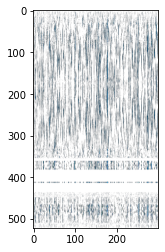

In [16]:
with open('transformed_image.pickle', 'rb') as f:
    transformed_image = pickle.load(f)
    
    
plt.imshow(np.clip(transformed_image,0,1))
plt.show()

>**Task 4: (2 Points)** Repeat task 3 on the transformed image. 




In [17]:
results_task4 = np.zeros(shape=[4,3])

#Please insert the code for Task 4 here to fill the results matrix

k=10
X_low_rank_approx_1=pca(logo, k)[0]
X_low_rank_approx_2=svd(logo, k)
X_low_rank_approx_3=nmf(logo, k)
X_low_rank_approx_4=mds(logo, k)
val=[f'X_low_rank_approx_{i+1}' for i in range(4)]
for i in range(4):
    # convertir la chaîne en nom de variable en utilisant globals() et locals() en Python
    results_task4[i,0]= evals(logo, globals()[val[i]])
    results_task4[i,1]= stress(logo, globals()[val[i]])
    results_task4[i,2]= Fnorm_difference(logo, globals()[val[i]])

metrics = ['evals', 'stress', 'norm']
methods = ['PCA', 'SVD', 'NMF', 'MDS']

print('\t',end='')
for j in range(3):
    print(metrics[j], end='\t')
print('')
for i in range(4):
    print(methods[i], end='\t')
    for j in range(3):
        print(np.round(results_task4[i,j],4),'\t', end='')
    print('')
    

/var/folders/1_/9c8h03l17j93d3mssy0xbbwc0000gn/T/ipykernel_71802/916136063.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  results_task4[i,0]= evals(logo, globals()[val[i]])


	evals	stress	norm	
PCA	0.3983 	0.2381 	6.6647 	
SVD	0.6554 	0.2449 	6.8363 	
NMF	2.0281 	0.7795 	76.5263 	
MDS	0.3983 	0.2381 	6.6647 	


>**Question 3: (4 Points)** Prove that the low rank approximations of $X_i$ and $X_i'$ obtained using the PCA algorithm capture equal amounts of the variance of the two images. Furthermore, proof that the principal components ($C_i U_{jk},$ and $C_i' U_{jk}'$ for $j\in \{1,\ldots, k\})$ are equal. (Note that in practice you might encounter principal components which are unequal since the obtained eigenvectors have opposing signs. This should not be a problem for you here since this question should be answered using a theoretical pen and paper proof.)  

## 3) Image Denoising

In this section we will use the eigenvectors used in the PCA of the original logo to denoise two noisy images of the logo. In the cell below we load the two noisy images.

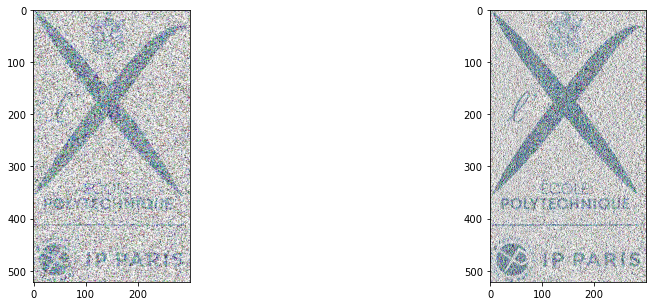

In [18]:
with open('noisy_image1.pickle', 'rb') as f:
    noisy_image1 = pickle.load(f)
    
with open('noisy_image2.pickle', 'rb') as f:
    noisy_image2 = pickle.load(f)
    
fig, axs = plt.subplots(1,2, figsize=(15,5))  
axs[0].imshow(np.clip(noisy_image1,0,1))
axs[1].imshow(np.clip(noisy_image2,0,1))
plt.show()

**Task 5: (6 Points)** Use the eigenvectors used in the PCA algorithm on the original image to obtain low rank approximations of the noisy images. Use the number of eigenvectors which minmises the distance of the denoised image and the original logo in the Frobenius norm metric introduced in Section 1). Make sure to enter the number of used eigenvectors in the plot titles.

In [21]:
#Please insert the code for Task 5 here
def denoise(k):
    X_low_rank_approx_noisy_image1=[]
    X_low_rank_approx_noisy_image2=[]
    
    # Center data
    M1 = np.mean(noisy_image1, axis=1)
    M2 = np.mean(noisy_image2, axis=1)
    
    U=pca(logo, k)[1]
    
    for i in range(4):
        C1= noisy_image1[:,:,i]-M1[:,i].reshape(-1,1)
        C2= noisy_image1[:,:,i]-M1[:,i].reshape(-1,1)

        
        X_low_rank_approx_noisy_image1.append(C1@U[:,:,i]@ U[:,:,i].T  + M1[:,i].reshape(-1,1))
        X_low_rank_approx_noisy_image2.append(C2@U[:,:,i]@ U[:,:,i].T  + M2[:,i].reshape(-1,1))
        
    X_low_rank_approx_noisy_image1=re_shape(X_low_rank_approx_noisy_image1,noisy_image1.shape)
    X_low_rank_approx_noisy_image2=re_shape(X_low_rank_approx_noisy_image2,noisy_image2.shape)
    return X_low_rank_approx_noisy_image1, X_low_rank_approx_noisy_image2
k=10
X_low_rank_approx_noisy_image1, X_low_rank_approx_noisy_image2= denoise(k)

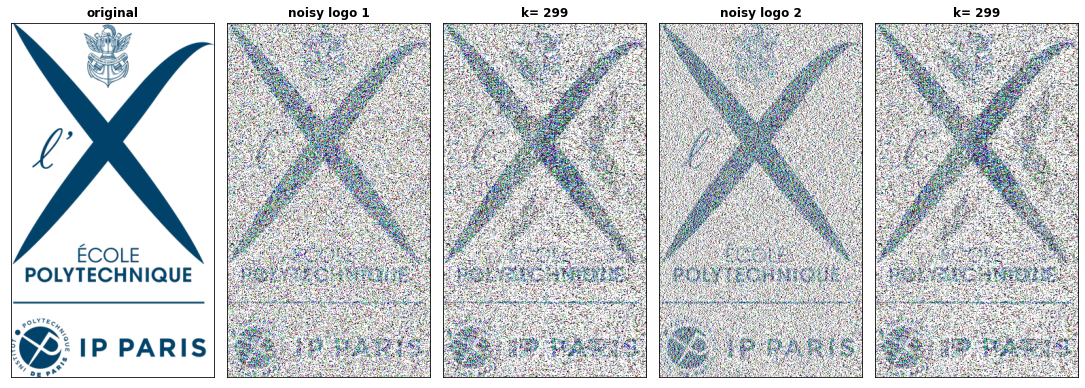

In [22]:
denoised_image1 = np.zeros(logo.shape)
denoised_image2 = np.zeros(logo.shape)


val_k=[i for i in range(300)]
dist1=[]
dist2=[]
for k in val_k:
    X_low_rank_approx_noisy_image1, X_low_rank_approx_noisy_image2= denoise(k)
    dist1.append(Fnorm_difference(noisy_image1, X_low_rank_approx_noisy_image1))
    dist2.append(Fnorm_difference(noisy_image2, X_low_rank_approx_noisy_image2))
    
    
n,m,D = logo.shape
k1_optimal = val_k[np.argmin(dist1)]  #Please insert the code for Task 5 here
k2_optimal = val_k[np.argmin(dist2)] #Please insert the code for Task 5 here

#Please insert the code for Task 5 here

denoised_image1= denoise(k1_optimal)[0]
denoised_image2= denoise(k2_optimal)[1]

fig, axs = plt.subplots(1,5, figsize=(15,5))    
axs[0].imshow(logo)
axs[1].imshow(np.clip(noisy_image1,0,1))
axs[2].imshow(np.clip(denoised_image1,0,1))
axs[3].imshow(np.clip(noisy_image2,0,1))
axs[4].imshow(np.clip(denoised_image2,0,1))



titles = ['original', 'noisy logo 1', 'k= %d'%(k1_optimal), 'noisy logo 2', 'k= %d'%(k2_optimal)]
for i in range(5):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(titles[i], fontweight='bold')
fig.tight_layout(pad=0)



**Question 4: (2 Points)** Comment on how the low rank approximation affects the level of noise in the images and explain the observed change in the level of noise visible in the low rank approximations. (We don't expect you to write more than 4 sentences in this answer.) 

**Question 5: (4 Points)** Are you able to draw conclusions about the structural properties of the noise added to the two images from your success in denoising them?